In [8]:
import numpy as np
import pandas as pd
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
from discretization import GridSpace
from agent_cont import QAgent, QLambdaAgent,QSpatialLambdaAgent


SEED = 42

np.random.seed(SEED)

In [9]:
# env = gym.make('Pendulum-v1')
env = gym.make('InvertedPendulum-v5')

action_gridspace = GridSpace(
    bounds = np.array([ [-3., 3.] ]),
    n_tiles = 100,
    single_idx = True
)
state_gridspace = GridSpace(
    bounds = np.array([ [-4., 4.], [-4., 4.], [-4., 4.], [-4., 4.] ]),
    n_tiles = 16,
    single_idx = True
)

agent = QAgent(
    env=env,
    discount_factor=0.95,
    initial_epsilon=1.0,
    epsilon_decay=0.99999,
    min_epsilon=0.05,
    learning_rate=0.5,
    learning_rate_decay=0.9999,
    min_learning_rate=0.1,
    seed=SEED,
    action_gridspace = action_gridspace,
    state_gridspace = state_gridspace,
    # trace_decay=0.9,
    # kernel= lambda x, y: np.exp(-np.linalg.norm(x-y)**2)
)

In [10]:
rewards = agent.learn(10000, 250)

Episodes:   0%|          | 0/10000 [00:00<?, ?it/s]

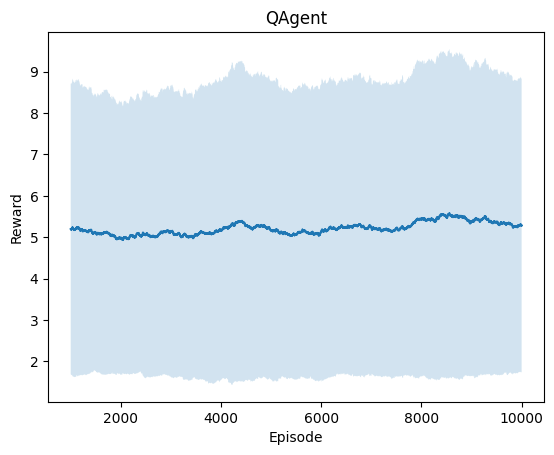

In [11]:
rewards_train = pd.Series(rewards)

r_mean = rewards_train.rolling(1000).mean()
r_std = rewards_train.rolling(1000).std()

fig, ax = plt.subplots()
ax.plot(r_mean, label='Mean Reward')
ax.fill_between(r_mean.index, r_mean-r_std, r_mean+r_std, alpha=0.2)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title(agent.__class__.__name__)
plt.show()

In [12]:
# Play
agent.play(1, 1e4, render=True)

  0%|          | 0/1 [00:00<?, ?it/s]

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


[8]

In [13]:
env.close()

In [14]:
any(rewards_train > 0)

True